## Pablo Elías Ramírez Escalante
## Mariana Almaguer Gonzalez
## Ian Emmanuel Reyes Yan
## Karol Alejandra Mar Palacios
## Alan Rodrigo Ceballos Moreno

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Carga y Limpieza de Datos

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Archivos csv/responses.csv")

df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [ ]:
df.isna().sum().sort_values(ascending=False).head(145)

Height                 20
Weight                 20
Passive sport          15
Chemistry              10
Geography               9
                       ..
Politics                1
Storm                   1
Law                     1
Fake                    1
Spending on gadgets     0
Length: 145, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [ ]:
{columna: df[columna].unique() for columna in df.select_dtypes(include=['object']).columns}

{'Smoking': array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
        nan], dtype=object),
 'Alcohol': array(['drink a lot', 'social drinker', 'never', nan], dtype=object),
 'Punctuality': array(['i am always on time', 'i am often early',
        'i am often running late', nan], dtype=object),
 'Lying': array(['never', 'sometimes', 'only to avoid hurting someone',
        'everytime it suits me', nan], dtype=object),
 'Internet usage': array(['few hours a day', 'most of the day', 'less than an hour a day',
        'no time at all'], dtype=object),
 'Gender': array(['female', 'male', nan], dtype=object),
 'Left - right handed': array(['right handed', 'left handed', nan], dtype=object),
 'Education': array(['college/bachelor degree', 'secondary school', 'primary school',
        'masters degree', 'doctorate degree',
        'currently a primary school pupil', nan], dtype=object),
 'Only child': array(['no', 'yes', nan], dtype=object),
 'Village - town': array(['v

In [ ]:
df["Gender"].value_counts()

female    593
male      411
Name: Gender, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'female' else (1 if x == 'male' else -1))
df['Left - right handed'] = df['Left - right handed'].apply(lambda x: 0 if x == 'right handed' else (1 if x == 'left handed' else -1))
df['Only child'] = df['Only child'].apply(lambda x: 0 if x == 'no' else (1 if x == 'yes' else -1))
df['Village - town'] = df['Village - town'].apply(lambda x: 0 if x == 'village' else (1 if x == 'city' else -1))
df['House - block of flats'] = df['House - block of flats'].apply(lambda x: 0 if x == 'block of flats' else (1 if x == 'house/bungalow' else -1))

In [ ]:
df["Gender"].unique()

array([ 0,  1, -1])

In [ ]:
df["Gender"].value_counts()

 0    593
 1    411
-1      6
Name: Gender, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(10), object(6)
memory usage: 1.2+ MB


In [ ]:
df.select_dtypes(include=['object'])

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Education
0,never smoked,drink a lot,i am always on time,never,few hours a day,college/bachelor degree
1,never smoked,drink a lot,i am often early,sometimes,few hours a day,college/bachelor degree
2,tried smoking,drink a lot,i am often running late,sometimes,few hours a day,secondary school
3,former smoker,drink a lot,i am often early,only to avoid hurting someone,most of the day,college/bachelor degree
4,tried smoking,social drinker,i am always on time,everytime it suits me,few hours a day,secondary school
...,...,...,...,...,...,...
1005,current smoker,drink a lot,i am often running late,everytime it suits me,few hours a day,secondary school
1006,never smoked,social drinker,i am often early,sometimes,less than an hour a day,masters degree
1007,tried smoking,social drinker,i am often running late,only to avoid hurting someone,most of the day,secondary school
1008,tried smoking,social drinker,i am often running late,sometimes,most of the day,college/bachelor degree


In [ ]:
{columna: df[columna].unique() for columna in df.select_dtypes(include=['object']).columns}

{'Smoking': array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
        nan], dtype=object),
 'Alcohol': array(['drink a lot', 'social drinker', 'never', nan], dtype=object),
 'Punctuality': array(['i am always on time', 'i am often early',
        'i am often running late', nan], dtype=object),
 'Lying': array(['never', 'sometimes', 'only to avoid hurting someone',
        'everytime it suits me', nan], dtype=object),
 'Internet usage': array(['few hours a day', 'most of the day', 'less than an hour a day',
        'no time at all'], dtype=object),
 'Education': array(['college/bachelor degree', 'secondary school', 'primary school',
        'masters degree', 'doctorate degree',
        'currently a primary school pupil', nan], dtype=object)}

In [ ]:
df.drop(columns=df.select_dtypes(include=['object']).columns, inplace=True)

df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,20.0,163.0,48.0,1.0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,19.0,163.0,58.0,2.0,0,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,2.0,20.0,176.0,67.0,2.0,0,0,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,22.0,172.0,59.0,1.0,0,0,1,1,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,4.0,20.0,170.0,59.0,1.0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 144 entries, Music to House - block of flats
dtypes: float64(134), int64(10)
memory usage: 1.1 MB


In [ ]:
df.isna().sum().sort_values(ascending=False).head(135)

Weight              20
Height              20
Passive sport       15
Chemistry           10
Geography            9
                    ..
Keeping promises     1
Fake                 1
Loneliness           1
Health               1
Gender               0
Length: 135, dtype: int64

In [ ]:
# Para Imputar / Reemplazar los valores faltantes se usa Imputer de sklearn.preprocessing
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df) , columns=df.columns)

In [ ]:
df.isna().sum().sort_values(ascending=False).head(135)

Music                       0
Slow songs or fast songs    0
Empathy                     0
Eating to survive           0
Giving                      0
                           ..
Biology                     0
Chemistry                   0
Reading                     0
Geography                   0
Foreign languages           0
Length: 135, dtype: int64

In [ ]:
X_cols = df.columns.values
X_cols

array(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies',
       'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western',
       'Action', 'History', 'Psychology', 'Politics', 'Mathematics',
       'Physics', 'Internet', 'PC', 'Economy Management', 'Biology',
       'Chemistry', 'Reading', 'Geography', 'Foreign languages',
       'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion',
       'Countryside, outdoors', 'Dancing', 'Musical instruments',
       'Writing', 'Passive sport', 'Active sport', 'Gardening',
       'Celebrities', 'Shopping', 'Science and technology', 'Theatre',
       'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm',
       'Darkness', 'Heights', '

In [ ]:
X = df.values
X.shape

(1010, 144)

# StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

In [ ]:
cov_m = np.cov(X_scaled.T)
cov_m.shape

(144, 144)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_m)

In [ ]:
eigenvalues

array([9.56565212, 7.83367195, 6.88715222, 4.09720847, 3.96294894,
       3.3753256 , 2.88723038, 2.69560402, 2.37218037, 2.22931052,
       2.058383  , 2.01848768, 1.98223566, 1.92842248, 1.77540412,
       1.74432954, 1.68925285, 1.67183864, 1.58238818, 1.55789829,
       1.52060594, 1.46658089, 1.43770225, 1.40660985, 1.35226782,
       1.33482854, 1.27927172, 1.24142971, 1.21662087, 1.19823524,
       1.18249822, 1.17575821, 1.14839974, 1.11778074, 1.11425623,
       1.09085174, 1.07213407, 1.05169753, 1.02135713, 1.01585364,
       1.00714573, 0.98959283, 0.97199618, 0.96166116, 0.94138522,
       0.92692873, 0.93608783, 0.91497116, 0.8832628 , 0.89673038,
       0.87286506, 0.17507604, 0.17844233, 0.8569775 , 0.81899435,
       0.82390846, 0.84178188, 0.83692196, 0.20331924, 0.80978285,
       0.7937424 , 0.21327987, 0.7848131 , 0.77735888, 0.76938619,
       0.2193142 , 0.22236088, 0.22926382, 0.75296418, 0.74660763,
       0.73827315, 0.72178077, 0.23782321, 0.24576157, 0.25021

In [ ]:
eigenvalues.shape

(144,)

In [ ]:
eigenvectors.shape

(144, 144)

In [ ]:
eigenvectors = eigenvectors.T

In [ ]:
eigenvectors[0, :]

array([-0.04051713,  0.05460835, -0.03078223, -0.07107293, -0.00690736,
       -0.04834341, -0.13557725, -0.07834635,  0.00997104,  0.07788182,
        0.0361718 ,  0.03073227,  0.00555219, -0.04789357, -0.02153566,
       -0.00749765, -0.12886208,  0.04288345, -0.05491099, -0.00735675,
        0.08903385,  0.08823383, -0.02229754, -0.18339363,  0.10378292,
        0.13032359, -0.1372411 , -0.08214417,  0.01375769,  0.10740806,
        0.13750636,  0.01280856, -0.07560725,  0.05419701,  0.06266057,
        0.09354656,  0.05849194,  0.14224361,  0.02548287, -0.09642988,
       -0.04898616, -0.14127553,  0.01212495, -0.08562384, -0.0824139 ,
       -0.0028639 ,  0.14367875, -0.11294763, -0.06171988, -0.07110865,
       -0.13600328, -0.04917791, -0.074786  ,  0.0483158 ,  0.06149358,
       -0.08935639, -0.10152236, -0.14884802,  0.1036299 , -0.14767414,
       -0.00792682,  0.09279115, -0.05491455, -0.09017834, -0.14465057,
       -0.14117527, -0.05372774, -0.12485545, -0.12436414, -0.12

In [ ]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.06636237, 0.12070901, 0.1684891 , 0.19691376, 0.224407  ,
       0.24782355, 0.26785391, 0.28655485, 0.30301201, 0.31847801,
       0.33275818, 0.34676158, 0.36051347, 0.37389204, 0.38620902,
       0.39831043, 0.41002974, 0.42162823, 0.43260616, 0.44341419,
       0.4539635 , 0.464138  , 0.47411216, 0.48387061, 0.49325206,
       0.50251253, 0.51138756, 0.52000007, 0.52844046, 0.5367533 ,
       0.54495696, 0.55311386, 0.56108097, 0.56883565, 0.57656588,
       0.58413373, 0.59157174, 0.59886796, 0.6059537 , 0.61300125,
       0.61998839, 0.62685376, 0.63359705, 0.64026864, 0.64679957,
       0.6532302 , 0.65972437, 0.66607205, 0.67219975, 0.67842087,
       0.68447644, 0.68569104, 0.68692899, 0.69287433, 0.69855616,
       0.70427209, 0.71011201, 0.71591821, 0.71732875, 0.72294667,
       0.72845332, 0.72993296, 0.73537766, 0.74077064, 0.74610831,
       0.74762981, 0.74917246, 0.75076299, 0.75598673, 0.76116637,
       0.76628819, 0.7712956 , 0.77294551, 0.7746505 , 0.77638

In [ ]:
p = eigenvectors [0:10, :]
p.shape

(10, 144)

In [ ]:
data_new = np.dot(p, X_scaled.T)
data_new.shape

(10, 1010)

In [ ]:
data_new = data_new.T
data_new.shape

(1010, 10)

In [ ]:
df_new = pd.DataFrame(data_new, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10'])

df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.025911,-0.719086,-1.012566,4.470572,0.317142,1.695764,-2.481079,-1.238532,-0.029934,0.212646
1,2.409561,-2.382320,1.815167,-0.700410,1.776802,-1.676015,-3.629902,-0.714147,-0.567315,0.866195
2,-1.761270,2.660176,2.715732,-1.219728,3.684417,1.234047,0.561288,-0.196714,0.341071,-2.380124
3,-0.842078,-4.516089,3.467695,-3.474079,-2.271808,-6.695388,0.232529,-2.379700,0.308347,0.449047
4,-0.495824,-0.222163,0.246779,2.313220,-0.869565,0.524800,-0.095595,-0.187116,2.432381,-2.735252


# Ploteo en 2D

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
labels = pd.DataFrame(data=df.Gender)
labels = labels.rename(columns={0: 'Gender'})
df_new = pd.concat([df_new, labels], axis=1, join="inner")

<Axes: xlabel='PC1', ylabel='PC2'>

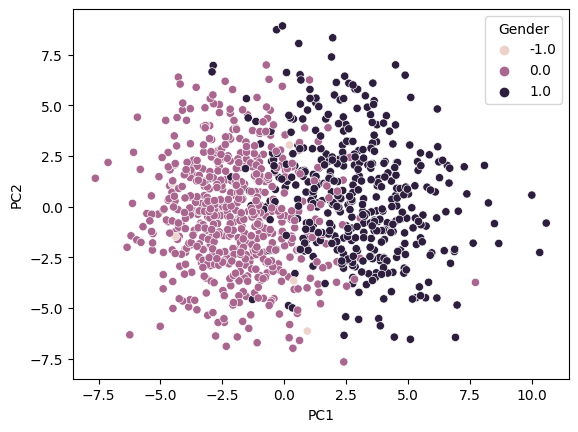

In [ ]:
sns.scatterplot(x='PC1', y='PC2', hue='Gender', data=df_new)

In [ ]:
df_new

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Gender
0,-1.025911,-0.719086,-1.012566,4.470572,0.317142,1.695764,-2.481079,-1.238532,-0.029934,0.212646,0.0
1,2.409561,-2.382320,1.815167,-0.700410,1.776802,-1.676015,-3.629902,-0.714147,-0.567315,0.866195,0.0
2,-1.761270,2.660176,2.715732,-1.219728,3.684417,1.234047,0.561288,-0.196714,0.341071,-2.380124,0.0
3,-0.842078,-4.516089,3.467695,-3.474079,-2.271808,-6.695388,0.232529,-2.379700,0.308347,0.449047,0.0
4,-0.495824,-0.222163,0.246779,2.313220,-0.869565,0.524800,-0.095595,-0.187116,2.432381,-2.735252,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1005,-2.819531,0.309980,-0.881795,-2.700366,2.931189,0.468417,0.057117,-0.178016,1.110414,0.619123,0.0
1006,4.465323,1.936240,1.627054,5.620345,-5.590929,2.839541,1.694869,1.328588,0.159309,-1.267882,1.0
1007,0.620064,-6.596804,4.731087,-1.567401,0.293367,-0.347841,-4.293327,0.031501,1.391214,-0.683197,0.0
1008,-2.931207,-1.123207,-0.400664,-2.131082,0.263832,-0.478717,-1.545979,0.635272,-0.230614,-0.747421,0.0


# Ploteo en 3D

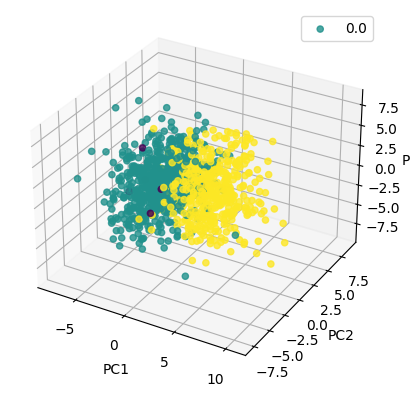

In [ ]:
from matplotlib.colors import ListedColormap

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_new['PC1']
y = df_new['PC2']
z = df_new['PC3']

colors = ListedColormap(["blue", "red"])


#labels = pd.DataFrame(data=cancer.target)
#labels = labels.rename(columns={0: 'label'})
#df_new = pd.concat([df_new, labels], axis=1, join="inner")

ax.scatter(x,y,z, marker='o', c=df_new['Gender'],alpha=0.8)


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(df_new['Gender'],loc="upper right")
plt.show()

In [ ]:
from sklearn import preprocessing

x = df_new.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_new_norm = pd.DataFrame(data=x_scaled, columns=df_new.columns)

In [ ]:
print(df_new_norm)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.362628  0.418404  0.456951  0.890985  0.497831  0.707969  0.191884   
1     0.551216  0.318106  0.624884  0.523312  0.598490  0.423489  0.089633   
2     0.322261  0.622186  0.678367  0.486387  0.730039  0.669013  0.462671   
3     0.372720  0.189432  0.723025  0.326095  0.319297  0.000000  0.433409   
4     0.391727  0.448371  0.531741  0.737590  0.415996  0.609174  0.404205   
...        ...       ...       ...       ...       ...       ...       ...   
1005  0.264169  0.480461  0.464717  0.381109  0.678097  0.604416  0.417797   
1006  0.664066  0.578530  0.613712  0.972738  0.090409  0.804470  0.563565   
1007  0.452983  0.063957  0.798055  0.461666  0.496192  0.535548  0.030584   
1008  0.258039  0.394035  0.493290  0.421586  0.494155  0.524506  0.275113   
1009  0.423425  0.376506  0.574335  0.802003  0.128125  0.682124  0.332100   

           PC8       PC9      PC10  Gender  
0     0.454229  0.

In [ ]:
import plotly.express as px

fig = px.scatter_ternary(df_new_norm, a="PC1", b="PC2", c="PC3", color="Gender", color_discrete_map={0: "blue", 1: "green", -1: "red"})
fig.show()